In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from six.moves import urllib
import os
from scipy.stats import zscore


# download 2-photon data
if not os.path.isfile('data/stimspont.npy'):
    if not os.path.exists('data'):
        os.mkdir('data')
    with urllib.request.urlopen('http://www.gatsby.ucl.ac.uk/~cstringer/stimspont.npy') as response:
        with open('data/stimspont.npy','wb') as f:
            f.write(response.read())

In [8]:
# load downloaded data
dat = np.load('data/stimspont.npy',allow_pickle=True) 
dat = dat.item()
resp  = dat['resp']   # stimulus responses x neurons
istim  = dat['istim'] # identity of stimulus (0-31)
resp = zscore(resp, axis=1)

In [5]:
import sys
# path to your local download of rastermap
sys.path.append(r'C:\Users\lgantar.WISMAIN\Documents\GitHub\rastermap\rastermap')
from mapping import Rastermap

# rastermap works the same as TSNE or UMAP
# create an instance of the Rastermap class
# class Rastermap:
"""rastermap embedding algorithm
    Rastermap first takes the top iPC's of the data, and then embeds them into
    n_X clusters. It returns upsampled cluster identities (n_X*upsamp).
    Clusters are also computed across Y (n_Y) and smoothed, to help with fitting.
    If n_components=2, n_X x n_X components are used.
    
    Parameters
    -----------
    n_components: int, optional (default: 1)
        dimension of the embedding space
    n_X: int, optional (default: 40)
        number of clusters in X
    n_Y: int, optional (default: 0)
        number of clusters in Y: will be used to smooth data before sorting in X
        if set to zero, no smoothing will occur
    iPC: nparray, int, optional (default: 0-399)
        which PCs to use during optimization
    nPC: int, optional (default: 400)
        if used, will take 0-nPC PCs during optimization
    init : initialization of algorithm (default: 'pca')
        can use 'pca', 'random', or a matrix n_samples x n_components
"""

model = Rastermap(n_components=2, n_X=40, nPC=400, init='pca')
out = model.fit_transform(resp)

nmin 400
0.04092979431152344
1.2093510627746582
1.276172399520874
1.2851495742797852
(1520, 1600)
(70,)
1.0
time; iteration;  explained PC variance
0.51s     0        0.0537      8
1.37s    10        0.2680      24
2.22s    20        0.4405      80
3.09s    30        0.6211      360
4.06s    40        0.6997      840
5.08s    50        0.7805      1520
6.21s    60        0.7819      1520
7.23s   final      0.7819
16.29s upsampled    0.7819


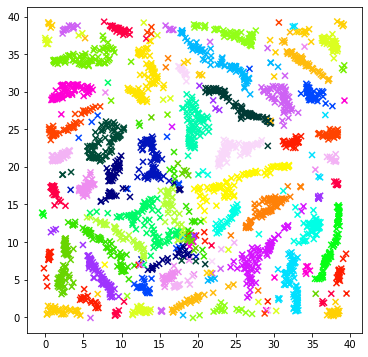

In [6]:
# plot results here
%matplotlib inline
cmap = cm.get_cmap('gist_ncar')
cmap = cmap(np.linspace(0,.97,32))
cmap = cmap[np.random.permutation(32),:]
plt.figure(figsize=(6,6))
# each point is colored based on stimulus identity
plt.scatter(out[:,0],out[:,1],color=cmap[istim,:],marker='x')
plt.show()

In [7]:
# classify results
import sklearn.neighbors

# classifier
n_neighbors = 1
clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
# fit classifier using half of the data
# low-dimensional data
svc = clf.fit(out[::2,:],istim[::2])
# predict stimuli from other half
istim_pred = clf.predict(out[1::2,:])
accuracy   = (istim_pred==istim[1::2]).mean()
print('stimulus classification accuracy: %2.3f'%accuracy)


stimulus classification accuracy: 0.945
